# Customer Retention Analysis for Syriatel Mobile Telecom

**Author: Kyle Weesner**

**April 2022**

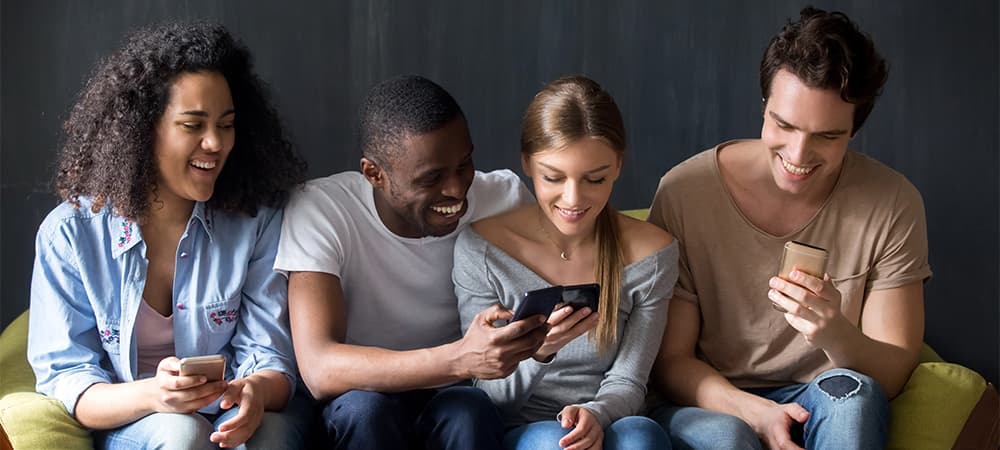

## Overview

Syriatel Mobile Telecom is a service pervider that currently serves more than 8 million people today having 199 international roaming partners in 116 countries.  As a data scientist, I am currently creating a model to predict when might customers churn.  By building a model to help predict when customers will deter away from the service I can either offer additional advice to for the company to allocate resources to make the customer happier and improve our services that may be not opitimal at the time.  This model can also provide wisedom where improvements to the company may need to be done.

## Business Problem

Service providers strive to maintain a healthy balance between gaining new customers while minimizing those who switch providers.  Syriatel provides service to more than 8 million people today and in our data set 15% of customers churned during this time period.  If this sample dataset somewhat resembles the total dataset this company has lost over a million customers.  As a business we want to maximize profit where it can be done without making unhappy customers, so one place this can be done is the retention rate of customers.  With our predictive model, we will improve features in our business that seem to have a correlation with leaving customers and at the same time offer additional support where our model predicted to customers who are considering leaving our service.  

## Data Understanding

For model building we used data from [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) aquired from kaggle.  This data file is available in the project repo in the folder "data".  

## Navigation

Follow through these notebooks in order to follow workflow.  They can be found in the workspace folder in this repository.

1. [Data Cleaning and Exploratory Data Analysis](./Data&#32;Cleaning&#32;and&#32;Exploratory&#32;Data&#32;Analysis.ipynb)

2. [Model Building](./Model&#32;Building.ipynb)

3. [Feature Importance Analysis](./Feature&#32;Importance&#32;Analysis.ipynb)

.

.

.

# Data Cleaning and EDA

Loading in libraries that will be needed

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Loading in data in a pandas dataframe

In [53]:
df = pd.read_csv("../data/Churn_in_Telecom's_dataset.csv")

### Looking over in the original uploaded dataframe before I alter with `.head()`, `.describe()`, `info()`.

In [54]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [55]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Thoughts after a brief lookover in `.head()` , `.describe()` , and `.info()`
-  state and area code need to be one hot encoded
-  international plan and voice mail plan need to be converted from yes/no to binary 1 & 0
-  churn needs to be converted from boolean to int(1 & 0)
-  don't need phone number column for making models.  Will `.drop()` because it will not provide helpful information for the model
-  All other columns will probably use in making model, unless decided otherwise later in notebook
-  Will need to scale depending on which estimators used in model building
-  Nothing seems too extreme or out of the normal in the `.describe()` so probably wont drop any outliers
-  No null values seen in `.info()`
    -Will do further exploration looking for empty ( ' ' ) cells or other variations of missing values
-  Will still do further exploration on other columns    

Brief look over every column for anything that stands out

In [57]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [58]:
columns = list(df.columns)
[{(x, (len(df[x].value_counts()))): [df[x].value_counts()]} for x in columns]  
#Able to view the value_counts in each column in a list that contains a dictionary

[{('state',
   51): [WV    106
   MN     84
   NY     83
   AL     80
   OR     78
   WI     78
   OH     78
   WY     77
   VA     77
   CT     74
   ID     73
   VT     73
   MI     73
   UT     72
   TX     72
   IN     71
   MD     70
   KS     70
   NJ     68
   NC     68
   MT     68
   WA     66
   CO     66
   NV     66
   RI     65
   MA     65
   MS     65
   AZ     64
   FL     63
   MO     63
   ND     62
   NM     62
   ME     62
   DE     61
   NE     61
   OK     61
   SD     60
   SC     60
   KY     59
   IL     58
   NH     56
   AR     55
   DC     54
   GA     54
   HI     53
   TN     53
   AK     52
   LA     51
   PA     45
   IA     44
   CA     34
   Name: state, dtype: int64]},
 {('account length',
   212): [105    43
   87     42
   93     40
   101    40
   90     39
          ..
   191     1
   199     1
   215     1
   221     1
   2       1
   Name: account length, Length: 212, dtype: int64]},
 {('area code',
   3): [415    1655
   510     840
   408     

Note from looking at columns `value_counts()`

    - state len 51
    - area code contains 3 categorical values
    - class imbalance in target (churn)

## Looking at the categorical columns that will need to be One Hot Encoded

##  state

In [59]:
len(df['state'].value_counts())

51

51 state???? Will need to make sure one is not repeated or typo.  If so, will need to combine with the correct state.

In [60]:
df['state'].value_counts().sort_index() #sorted index so its ordered in a easier to read form

AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
Name: state, dtype: int64

51 because including DC??? I believe they are refering to the District of Columbia.  This is fine.  I will leave this column alone until One hot encoding 

In [61]:
df['area code'].value_counts(normalize=False), df['area code'].value_counts(normalize=True)

(415    1655
 510     840
 408     838
 Name: area code, dtype: int64,
 415    0.496550
 510    0.252025
 408    0.251425
 Name: area code, dtype: float64)

I will leave this column alone until One hot encoding

.

.

.

### Looking at and converting the Binary columns  to 1 and 0

In [62]:
df.churn.value_counts(), df.churn.value_counts(normalize=True) #confirming binary before converting

(False    2850
 True      483
 Name: churn, dtype: int64,
 False    0.855086
 True     0.144914
 Name: churn, dtype: float64)

In [63]:
df.loc[df['churn'] == True, 'churn'] = 1  #converting True to 1
df.loc[df['churn'] == False, 'churn'] = 0  #converting False to 0
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [64]:
df['international plan'].value_counts(), df['international plan'].value_counts(normalize=True) 
#confirming binary before converting

(no     3010
 yes     323
 Name: international plan, dtype: int64,
 no     0.90309
 yes    0.09691
 Name: international plan, dtype: float64)

In [65]:
df['international plan'] = df['international plan'].replace('yes', 1) #replacing yes with 1
df['international plan'] = df['international plan'].replace('no', 0) #replacing no with 0
df['international plan'].value_counts()

0    3010
1     323
Name: international plan, dtype: int64

In [66]:
df['voice mail plan'].value_counts(), df['voice mail plan'].value_counts(normalize=True) #confirming binary before converting

(no     2411
 yes     922
 Name: voice mail plan, dtype: int64,
 no     0.723372
 yes    0.276628
 Name: voice mail plan, dtype: float64)

In [67]:
df['voice mail plan'] = df['voice mail plan'].replace('yes', 1) #replacing yes with 1
df['voice mail plan'] = df['voice mail plan'].replace('no', 0) #replacing no with 0
df['voice mail plan'].value_counts()

0    2411
1     922
Name: voice mail plan, dtype: int64

In [68]:
df.head()  # looking at dataframe to make sure changes were made

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


.

.

.

### Removing unwanted columns

In [69]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [70]:
df.drop(columns='phone number', inplace=True) 
#removing the column 'phone number' because I don't think an ID equivilant information will be useful for model

Checking to make sure 'phone number' is removed

In [71]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

.

Looking at columns colinearity to possibly remove some columns.  Classifiers don't mind collinearity but having extra features can slow down the time to run models

<AxesSubplot:>

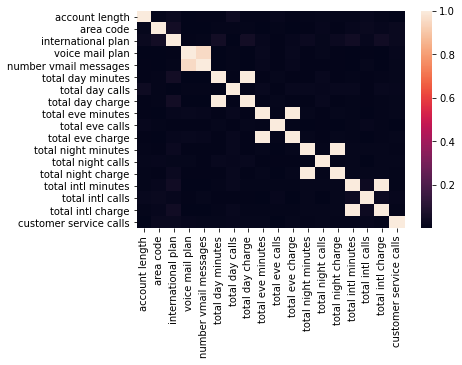

In [72]:
sns.heatmap(df.corr().abs()) #looking at heatmap

<AxesSubplot:>

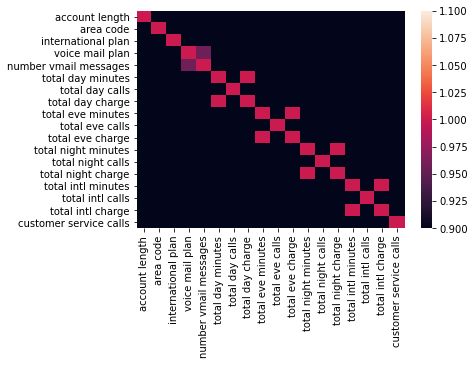

In [73]:
sns.heatmap(df.corr().abs(), vmin=.9, vmax=1.1) 
#changed the range bar to see the quickly see the 1 pearson correlation to know if there columns that fully explain eachother

In [74]:
voicemail = df[['number vmail messages', 'voice mail plan', 'total day charge', 'total day minutes' ,'total eve charge', 'total eve minutes','total night charge', 'total night minutes','total intl charge', 'total intl minutes']]
voicemail.corr()  #looking at the correlations of the higher correlated values

,number vmail messages,voice mail plan,total day charge,total day minutes,total eve charge,total eve minutes,total night charge,total night minutes,total intl charge,total intl minutes
number vmail messages,1.000000,0.956927,0.000776,0.000778,0.017578,0.017562,0.007663,0.007681,0.002884,0.002856
voice mail plan,0.956927,1.000000,-0.001686,-0.001684,0.021559,0.021545,0.006064,0.006079,-0.001276,-0.001318
total day charge,0.000776,-0.001686,1.000000,1.000000,0.007036,0.007050,0.004301,0.004324,-0.010094,-0.010157
total day minutes,0.000778,-0.001684,1.000000,1.000000,0.007029,0.007043,0.004300,0.004323,-0.010092,-0.010155
total eve charge,0.017578,0.021559,0.007036,0.007029,1.000000,1.000000,-0.012601,-0.012592,-0.011074,-0.011043
total eve minutes,0.017562,0.021545,0.007050,0.007043,1.000000,1.000000,-0.012593,-0.012584,-0.011067,-0.011035
total night charge,0.007663,0.006064,0.004301,0.004300,-0.012601,-0.012593,1.000000,0.999999,-0.015186,-0.015214
total night minutes,0.007681,0.006079,0.004324,0.004323,-0.012592,-0.012584,0.999999,1.000000,-0.015180,-0.015207
total intl charge,0.002884,-0.001276,-0.010094,-0.010092,-0.011074,-0.011067,-0.015186,-0.015180,1.000000,0.999993
total intl minutes,0.002856,-0.001318,-0.010157,-0.010155,-0.011043,-0.011035,-0.015214,-0.015207,0.999993,1.000000


Need to drop one features between the colinear sets (have a correlation coef ~1)
- total day charge | total day minutes
- total eve charge | total eve minutes
- total night charge | total night minutes
- total int charge | total intl minutes

Number vmail messages | voice mail plan ~.95 should i remove?  I will keep because they do not totally correlate with eachother.  May make the models better.

In [75]:
df = df.drop(columns=['total day minutes','total eve minutes','total night minutes','total intl minutes'])
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
3329,WV,68,415,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
3330,RI,28,510,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0
3331,CT,184,510,1,0,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0


<AxesSubplot:>

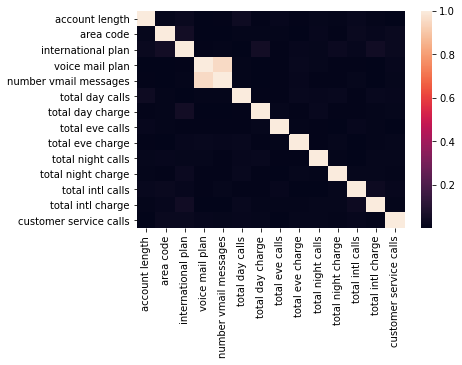

In [76]:
sns.heatmap(df.corr().abs())  #checking to make sure all columns that were intended to remove are gone

.

.

### Checking for other variations of missing values in dataframe 

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl calls        3333 non-null   int64  
 13  total intl charge       3333 non-null   float64
 14  customer service calls  3333 non-null   

There are no nulls being detected in `.info()`.  Will need to look in data for different variations that nulls or empty values may be listed as.

In [78]:
np.where(df.applymap(lambda x: x == ' '))

(array([], dtype=int64), array([], dtype=int64))

In [79]:
np.where(df.applymap(lambda x: x == 'NA'))

(array([], dtype=int64), array([], dtype=int64))

In [80]:
np.where(df.applymap(lambda x: x == 'nan'))

(array([], dtype=int64), array([], dtype=int64))

In [81]:
np.where(df.applymap(lambda x: x == 'NaN'))

(array([], dtype=int64), array([], dtype=int64))

In [82]:
df = df.replace(' ', np.nan)  

In [83]:
df.isna().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day calls           0
total day charge          0
total eve calls           0
total eve charge          0
total night calls         0
total night charge        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

After further examination, there still appears to be no missing values in this dataset.

.

.

.

Just some curious data exploration.  Looking into if account length for stay and churn are significantly different.

100.79368421052632

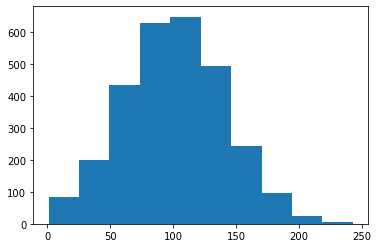

In [84]:
df_stay = df[df.churn == 0]
plt.hist(df_stay['account length']); df_stay['account length'].mean()

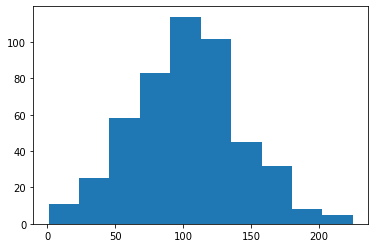

In [85]:
df_churn = df[df.churn == 1]
plt.hist(df_churn['account length']);

In [86]:
churn_acc_len_list = list(df_churn['account length'])

In [87]:
result = stats.ttest_1samp(churn_acc_len_list, df_stay['account length'].mean())
t_stat, p_value = result
result

Ttest_1sampResult(statistic=1.041798666402631, pvalue=0.2980272890643061)

p-values > alpha(.05) so there is a no difference between account length between churn and stayed.  

.

.

.

Saving cleaned data frame to a csv to be able access in different workbooks.  **Continue onto Model Building notebook**

In [88]:
df.to_csv('../data/clean_df.csv')